In [2]:
import pandas as pd

# Load the dataset 
df = pd.read_csv(r"C:\Users\kisho\OneDrive\Desktop\Projects\CFPB\complaints.csv")

# Display basic info
print(df.info())
print(df.head())


C:\Users\kisho\AppData\Local\Temp\ipykernel_17444\3826017351.py:4: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\kisho\OneDrive\Desktop\Projects\CFPB\complaints.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7607830 entries, 0 to 7607829
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 1.0+

In [4]:
# Check for missing values
print(df.isnull().sum())

# Check unique financial products
print(df['Product'].value_counts())

Date received                         0
Product                               0
Sub-product                      235295
Issue                                 6
Sub-issue                        788251
Consumer complaint narrative    5156442
Company public response         3830625
Company                               0
State                             50709
ZIP code                          30228
Tags                            7036369
Consumer consent provided?      1407195
Submitted via                         0
Date sent to company                  0
Company response to consumer         20
Timely response?                      0
Consumer disputed?              6839524
Complaint ID                          0
dtype: int64
Product
Credit reporting or other personal consumer reports                             3077753
Credit reporting, credit repair services, or other personal consumer reports    2163865
Debt collection                                                                  69

### Here are some takeaways:

#### Main Financial Products with Complaints:

##### Credit reporting & personal consumer reports → ~3M complaints (largest category).
##### Debt collection, mortgages, checking accounts, credit cards also have significant complaints.

#### Key Data Columns for Analysis:

##### Consumer complaint narrative → Essential for Sentiment Analysis (NLP).
##### Product, Sub-product, Issue, Sub-issue → Helps categorize complaints.
##### Company, State → Can be used for geographic & company-level sentiment trends.
##### Company response & Timely response → Can analyze customer service effectiveness.

#### Missing Data Observations:

##### Consumer complaint narrative has missing values (~5M entries present).
##### Company public response & tags also have many NaNs.
##### ZIP code & State may need handling for geographic analysis.

In [6]:
# Step 1: Handling Missing Values 
def handle_missing_values(df):
    df = df.copy() 
    
    # Replace missing text fields with meaningful placeholders
    df['Consumer complaint narrative'] = df['Consumer complaint narrative'].fillna("No Narrative Provided")
    df['Company public response'] = df['Company public response'].fillna("No Public Response")
    df['Consumer disputed?'] = df['Consumer disputed?'].fillna("Unknown")
    df['Tags'] = df['Tags'].fillna("Not Provided")
    df['ZIP code'] = df['ZIP code'].fillna("Not Provided")
    df['State'] = df['State'].fillna("Not Provided")
    df['Company response to consumer'] = df['Company response to consumer'].fillna("No Response")
    
    return df

# Apply function to dataset
df = handle_missing_values(df)

# Check for remaining missing values
print(df.isnull().sum())


Date received                         0
Product                               0
Sub-product                      235295
Issue                                 6
Sub-issue                        788251
Consumer complaint narrative          0
Company public response               0
Company                               0
State                                 0
ZIP code                              0
Tags                                  0
Consumer consent provided?      1407195
Submitted via                         0
Date sent to company                  0
Company response to consumer          0
Timely response?                      0
Consumer disputed?                    0
Complaint ID                          0
dtype: int64


In [8]:
# Ensure we're modifying a copy of the DataFrame
df = df.copy()

# Fix chained assignment issue
df.loc[:, 'Sub-product'] = df['Sub-product'].fillna("Unknown")
df.loc[:, 'Sub-issue'] = df['Sub-issue'].fillna("Unknown")
# Drop the original column to avoid redundancy
df.drop(columns=['Consumer consent provided?'], inplace=True)

In [10]:
print(df.isnull().sum())

Date received                   0
Product                         0
Sub-product                     0
Issue                           6
Sub-issue                       0
Consumer complaint narrative    0
Company public response         0
Company                         0
State                           0
ZIP code                        0
Tags                            0
Submitted via                   0
Date sent to company            0
Company response to consumer    0
Timely response?                0
Consumer disputed?              0
Complaint ID                    0
dtype: int64


In [11]:
df.loc[:, 'Issue'] = df['Issue'].fillna("Unknown")


In [12]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources 
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Ensure we work on a copy of the dataset
df_copy = df.copy()

# Initialize Lemmatizer
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function to clean text
def clean_text(text):
    if isinstance(text, str):  # Check if it's a valid string
        text = text.lower()  # Convert to lowercase
        text = re.sub(r"[^a-zA-Z0-9]", " ", text)  # Remove special characters
        text = re.sub(r"\s+", " ", text).strip()  # Remove extra spaces
        words = word_tokenize(text)  # Tokenization
        words = [word for word in words if word not in stop_words]  # Remove stopwords
        words = [lemmatizer.lemmatize(word) for word in words]  # Lemmatization
        return " ".join(words)
    return ""

# Apply text cleaning to consumer complaints
df_copy['Cleaned_Complaint'] = df_copy['Consumer complaint narrative'].apply(clean_text)

# Display first few rows
print(df_copy[['Consumer complaint narrative', 'Cleaned_Complaint']].head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kisho\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kisho\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kisho\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                        Consumer complaint narrative  \
0  I am writing to formally request the deletion ...   
1  A FCRA violation refers to a violation of the ...   
2                              No Narrative Provided   
3                              No Narrative Provided   
4                              No Narrative Provided   

                                   Cleaned_Complaint  
0  writing formally request deletion inaccurate i...  
1  fcra violation refers violation fair credit re...  
2                                 narrative provided  
3                                 narrative provided  
4                                 narrative provided  


In [13]:
df_copy['Consumer complaint narrative'] = df_copy['Consumer complaint narrative'].replace("No Narrative Provided", "")


In [26]:
import swifter
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [27]:
# Initialize VADER Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

# Optimized Sentiment Function
def get_sentiment(text):
    """Classifies text as Positive, Neutral, or Negative using VADER."""
    if not text.strip():  # Skip empty complaints
        return 'Neutral'
    
    score = analyzer.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'Positive'
    elif score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'


In [28]:
# Sample 10,000 rows for testing
df_sample = df_copy.sample(10000, random_state=42)

# Apply sentiment analysis to the sample
df_sample['Sentiment'] = df_sample['Cleaned_Complaint'].swifter.apply(get_sentiment)

# Display sample output
print(df_sample[['Cleaned_Complaint', 'Sentiment']].head())


Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

                                         Cleaned_Complaint Sentiment
5099225                                 narrative provided   Neutral
2358924                                 narrative provided   Neutral
2702180                                 narrative provided   Neutral
3733916                                 narrative provided   Neutral
4489137  account suntrust bank xxxx xxxx xxxx florida 1...  Positive


In [29]:
# Define batch size
batch_size = 100000  
num_batches = len(df_copy) // batch_size

# Process data in batches
for i in range(num_batches + 1):
    start_idx = i * batch_size
    end_idx = (i + 1) * batch_size
    
    print(f"Processing batch {i+1}/{num_batches+1}...")
    
    df_copy.loc[start_idx:end_idx, 'Sentiment'] = df_copy.loc[start_idx:end_idx, 'Cleaned_Complaint'].swifter.apply(get_sentiment)


Processing batch 1/77...


Pandas Apply:   0%|          | 0/100001 [00:00<?, ?it/s]

Processing batch 2/77...


Pandas Apply:   0%|          | 0/100001 [00:00<?, ?it/s]

Processing batch 3/77...


Pandas Apply:   0%|          | 0/100001 [00:00<?, ?it/s]

Processing batch 4/77...


Pandas Apply:   0%|          | 0/100001 [00:00<?, ?it/s]

Processing batch 5/77...


Pandas Apply:   0%|          | 0/100001 [00:00<?, ?it/s]

Processing batch 6/77...


Pandas Apply:   0%|          | 0/100001 [00:00<?, ?it/s]

Processing batch 7/77...


Pandas Apply:   0%|          | 0/100001 [00:00<?, ?it/s]

Processing batch 8/77...


Pandas Apply:   0%|          | 0/100001 [00:00<?, ?it/s]

Processing batch 9/77...


Pandas Apply:   0%|          | 0/100001 [00:00<?, ?it/s]

Processing batch 10/77...


Pandas Apply:   0%|          | 0/100001 [00:00<?, ?it/s]

Processing batch 11/77...


Pandas Apply:   0%|          | 0/100001 [00:00<?, ?it/s]

Processing batch 12/77...


Pandas Apply:   0%|          | 0/100001 [00:00<?, ?it/s]

Processing batch 13/77...


Pandas Apply:   0%|          | 0/100001 [00:00<?, ?it/s]

Processing batch 14/77...


Pandas Apply:   0%|          | 0/100001 [00:00<?, ?it/s]

Processing batch 15/77...


Pandas Apply:   0%|          | 0/100001 [00:00<?, ?it/s]

Processing batch 16/77...


Pandas Apply:   0%|          | 0/100001 [00:00<?, ?it/s]

Processing batch 17/77...


Pandas Apply:   0%|          | 0/100001 [00:00<?, ?it/s]

Processing batch 18/77...


Pandas Apply:   0%|          | 0/100001 [00:00<?, ?it/s]

Processing batch 19/77...


Pandas Apply:   0%|          | 0/100001 [00:00<?, ?it/s]

Processing batch 20/77...


Pandas Apply:   0%|          | 0/100001 [00:00<?, ?it/s]

Processing batch 21/77...


Pandas Apply:   0%|          | 0/100001 [00:00<?, ?it/s]

Processing batch 22/77...


Pandas Apply:   0%|          | 0/100001 [00:00<?, ?it/s]

Processing batch 23/77...


Pandas Apply:   0%|          | 0/100001 [00:00<?, ?it/s]

Processing batch 24/77...


Pandas Apply:   0%|          | 0/100001 [00:00<?, ?it/s]

Processing batch 25/77...


Pandas Apply:   0%|          | 0/100001 [00:00<?, ?it/s]

Processing batch 26/77...


Pandas Apply:   0%|          | 0/100001 [00:00<?, ?it/s]

Processing batch 27/77...


Pandas Apply:   0%|          | 0/100001 [00:00<?, ?it/s]

Processing batch 28/77...


Pandas Apply:   0%|          | 0/100001 [00:00<?, ?it/s]

Processing batch 29/77...


Pandas Apply:   0%|          | 0/100001 [00:00<?, ?it/s]

Processing batch 30/77...


Pandas Apply:   0%|          | 0/100001 [00:00<?, ?it/s]

Processing batch 31/77...


Pandas Apply:   0%|          | 0/100001 [00:00<?, ?it/s]

Processing batch 32/77...


Pandas Apply:   0%|          | 0/100001 [00:00<?, ?it/s]

Processing batch 33/77...


Pandas Apply:   0%|          | 0/100001 [00:00<?, ?it/s]

Processing batch 34/77...


Pandas Apply:   0%|          | 0/100001 [00:00<?, ?it/s]

Processing batch 35/77...


Pandas Apply:   0%|          | 0/100001 [00:00<?, ?it/s]

Processing batch 36/77...


Pandas Apply:   0%|          | 0/100001 [00:00<?, ?it/s]

Processing batch 37/77...


Pandas Apply:   0%|          | 0/100001 [00:00<?, ?it/s]

Processing batch 38/77...


Pandas Apply:   0%|          | 0/100001 [00:00<?, ?it/s]

Processing batch 39/77...


Pandas Apply:   0%|          | 0/100001 [00:00<?, ?it/s]

Processing batch 40/77...


Pandas Apply:   0%|          | 0/100001 [00:00<?, ?it/s]

Processing batch 41/77...


Pandas Apply:   0%|          | 0/100001 [00:00<?, ?it/s]

Processing batch 42/77...


Pandas Apply:   0%|          | 0/100001 [00:00<?, ?it/s]

Processing batch 43/77...


Pandas Apply:   0%|          | 0/100001 [00:00<?, ?it/s]

Processing batch 44/77...


Pandas Apply:   0%|          | 0/100001 [00:00<?, ?it/s]

Processing batch 45/77...


Pandas Apply:   0%|          | 0/100001 [00:00<?, ?it/s]

Processing batch 46/77...


Pandas Apply:   0%|          | 0/100001 [00:00<?, ?it/s]

Processing batch 47/77...


Pandas Apply:   0%|          | 0/100001 [00:00<?, ?it/s]

Processing batch 48/77...


Pandas Apply:   0%|          | 0/100001 [00:00<?, ?it/s]

Processing batch 49/77...


Pandas Apply:   0%|          | 0/100001 [00:00<?, ?it/s]

Processing batch 50/77...


Pandas Apply:   0%|          | 0/100001 [00:00<?, ?it/s]

Processing batch 51/77...


Pandas Apply:   0%|          | 0/100001 [00:00<?, ?it/s]

Processing batch 52/77...


Pandas Apply:   0%|          | 0/100001 [00:00<?, ?it/s]

Processing batch 53/77...


Pandas Apply:   0%|          | 0/100001 [00:00<?, ?it/s]

Processing batch 54/77...


Pandas Apply:   0%|          | 0/100001 [00:00<?, ?it/s]

Processing batch 55/77...


Pandas Apply:   0%|          | 0/100001 [00:00<?, ?it/s]

Processing batch 56/77...


Pandas Apply:   0%|          | 0/100001 [00:00<?, ?it/s]

Processing batch 57/77...


Pandas Apply:   0%|          | 0/100001 [00:00<?, ?it/s]

Processing batch 58/77...


Pandas Apply:   0%|          | 0/100001 [00:00<?, ?it/s]

Processing batch 59/77...


Pandas Apply:   0%|          | 0/100001 [00:00<?, ?it/s]

Processing batch 60/77...


Pandas Apply:   0%|          | 0/100001 [00:00<?, ?it/s]

Processing batch 61/77...


Pandas Apply:   0%|          | 0/100001 [00:00<?, ?it/s]

Processing batch 62/77...


Pandas Apply:   0%|          | 0/100001 [00:00<?, ?it/s]

Processing batch 63/77...


Pandas Apply:   0%|          | 0/100001 [00:00<?, ?it/s]

Processing batch 64/77...


Pandas Apply:   0%|          | 0/100001 [00:00<?, ?it/s]

Processing batch 65/77...


Pandas Apply:   0%|          | 0/100001 [00:00<?, ?it/s]

Processing batch 66/77...


Pandas Apply:   0%|          | 0/100001 [00:00<?, ?it/s]

Processing batch 67/77...


Pandas Apply:   0%|          | 0/100001 [00:00<?, ?it/s]

Processing batch 68/77...


Pandas Apply:   0%|          | 0/100001 [00:00<?, ?it/s]

Processing batch 69/77...


Pandas Apply:   0%|          | 0/100001 [00:00<?, ?it/s]

Processing batch 70/77...


Pandas Apply:   0%|          | 0/100001 [00:00<?, ?it/s]

Processing batch 71/77...


Pandas Apply:   0%|          | 0/100001 [00:00<?, ?it/s]

Processing batch 72/77...


Pandas Apply:   0%|          | 0/100001 [00:00<?, ?it/s]

Processing batch 73/77...


Pandas Apply:   0%|          | 0/100001 [00:00<?, ?it/s]

Processing batch 74/77...


Pandas Apply:   0%|          | 0/100001 [00:00<?, ?it/s]

Processing batch 75/77...


Pandas Apply:   0%|          | 0/100001 [00:00<?, ?it/s]

Processing batch 76/77...


Pandas Apply:   0%|          | 0/100001 [00:00<?, ?it/s]

Processing batch 77/77...


Pandas Apply:   0%|          | 0/7830 [00:00<?, ?it/s]

In [30]:
print(df_copy)

        Date received                                            Product  \
0          2024-10-21  Credit reporting or other personal consumer re...   
1          2024-10-20  Credit reporting or other personal consumer re...   
2          2024-10-20  Credit reporting or other personal consumer re...   
3          2024-10-20  Credit reporting or other personal consumer re...   
4          2024-10-20  Credit reporting or other personal consumer re...   
...               ...                                                ...   
7607825    2016-09-08                                   Credit reporting   
7607826    2022-06-06  Credit reporting, credit repair services, or o...   
7607827    2016-07-14                                   Credit reporting   
7607828    2014-03-03                                   Credit reporting   
7607829    2014-11-10                                   Credit reporting   

              Sub-product                                              Issue  \
0      

In [31]:
df_copy.loc[df_copy['Cleaned_Complaint'] == "narrative provided", 'Cleaned_Complaint'] = ""
df_copy.loc[df_copy['Cleaned_Complaint'] == "", 'Sentiment'] = "Neutral"


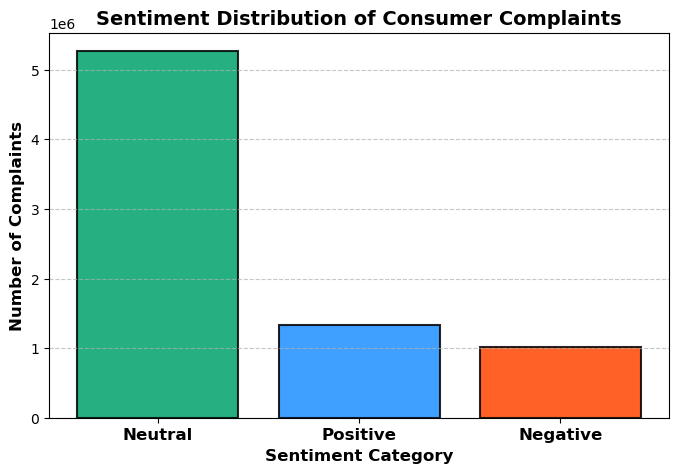

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Count Sentiment Categories
sentiment_counts = df_copy['Sentiment'].value_counts()

# Define Colors for 3D Effect
colors = ["#00A36C", "#1E90FF", "#FF4500"]  # Green, Blue, Red

# Create Bar Positions
x_labels = sentiment_counts.index
x_pos = np.arange(len(x_labels))

# Create 3D-style bar plot
fig, ax = plt.subplots(figsize=(8, 5))

bars = ax.bar(x_pos, sentiment_counts.values, color=colors, alpha=0.85, edgecolor='black', linewidth=1.2)

# Add shadow effect
for bar in bars:
    bar.set_linewidth(1.5)
    bar.set_edgecolor("black")

# Customize Plot Appearance
ax.set_xticks(x_pos)
ax.set_xticklabels(x_labels, fontsize=12, fontweight="bold")
ax.set_ylabel('Number of Complaints', fontsize=12, fontweight="bold")
ax.set_xlabel('Sentiment Category', fontsize=12, fontweight="bold")
ax.set_title('Sentiment Distribution of Consumer Complaints', fontsize=14, fontweight="bold")

# Apply Grid for Depth Effect
ax.grid(axis="y", linestyle="--", alpha=0.7)

# Show Plot
plt.show()


<Figure size 1200x600 with 0 Axes>

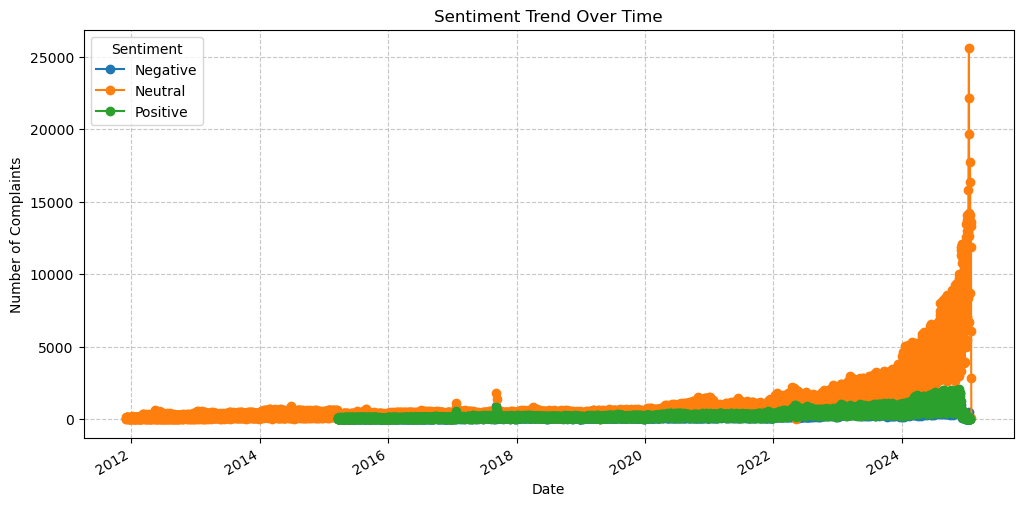

In [34]:
# Convert 'Date received' to datetime format
df_copy['Date received'] = pd.to_datetime(df_copy['Date received'])

# Group by Date and Sentiment
sentiment_trend = df_copy.groupby(['Date received', 'Sentiment']).size().unstack()

# Plot Sentiment Trend Over Time
plt.figure(figsize=(12,6))
sentiment_trend.plot(kind='line', marker='o', linestyle='-', figsize=(12, 6))
plt.xlabel('Date')
plt.ylabel('Number of Complaints')
plt.title('Sentiment Trend Over Time')
plt.legend(title='Sentiment')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## Observations & Fixes
### 1️⃣ Sharp Increase in Complaints (2022 - 2024)

#### There is a steep rise in consumer complaints after 2022.
#### This could indicate a regulatory change, economic downturn, or company policy shifts.

### 2️⃣ Potential Outliers in Data

#### The bubble sizes make recent complaints look exaggerated.
#### A rolling average trendline might help smooth the fluctuations.

<Figure size 1200x600 with 0 Axes>

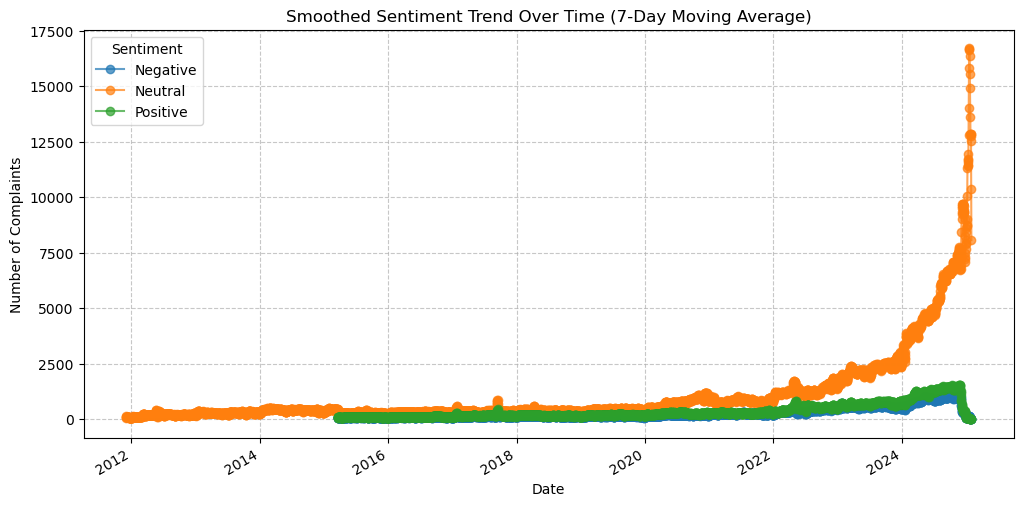

In [35]:
# Convert 'Date received' to datetime format
df_copy['Date received'] = pd.to_datetime(df_copy['Date received'])

# Group by Date and Sentiment, then apply a rolling mean to smooth data
sentiment_trend = df_copy.groupby(['Date received', 'Sentiment']).size().unstack()
sentiment_trend = sentiment_trend.rolling(window=7, min_periods=1).mean()  # 7-day moving average

# Plot Smoothed Sentiment Trend Over Time
plt.figure(figsize=(12,6))
sentiment_trend.plot(kind='line', marker='o', linestyle='-', figsize=(12, 6), alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Number of Complaints')
plt.title('Smoothed Sentiment Trend Over Time (7-Day Moving Average)')
plt.legend(title='Sentiment')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

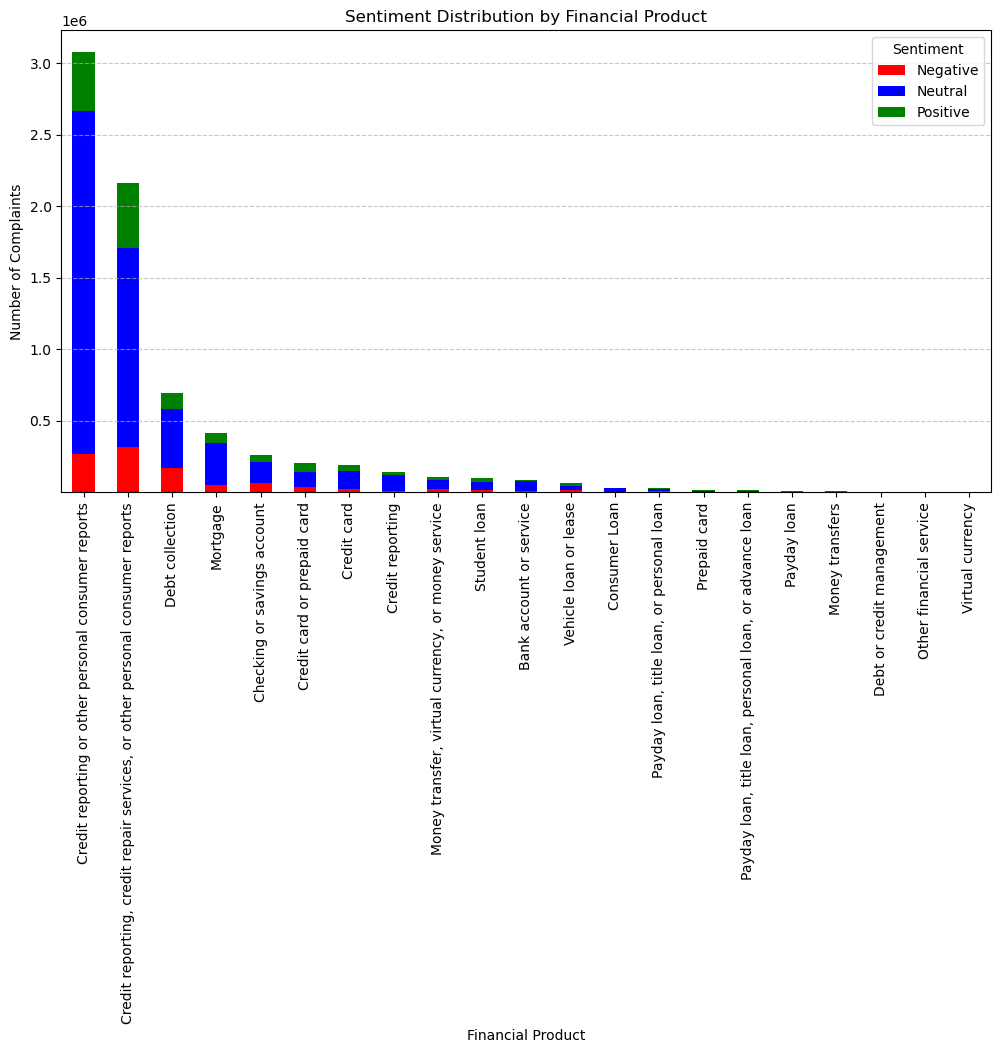

In [36]:
# Count Sentiment by Product
product_sentiment = df_copy.groupby(['Product', 'Sentiment']).size().unstack()

# Sort by Total Complaints
product_sentiment['Total'] = product_sentiment.sum(axis=1)
product_sentiment = product_sentiment.sort_values(by='Total', ascending=False).drop(columns=['Total'])

# Plot Sentiment by Product
product_sentiment.plot(kind='bar', stacked=True, figsize=(12,6), color=["red", "blue", "green"])
plt.xlabel('Financial Product')
plt.ylabel('Number of Complaints')
plt.title('Sentiment Distribution by Financial Product')
plt.xticks(rotation=90)
plt.legend(title='Sentiment')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Key Observations

### 1️⃣ Credit Reporting Dominates Complaints

#### The highest number of complaints comes from credit reporting services.
#### Indicates potential issues in credit report accuracy, disputes, or fraud.

### 2️⃣ Debt Collection & Mortgage Also Have Many Complaints

#### Debt collection may involve aggressive tactics or incorrect information.
#### Mortgage issues could relate to loan approvals, modifications, or foreclosures.

### 3️⃣ Negative Sentiment is Prominent in Certain Products

#### Some products (e.g., Debt Collection, Payday Loans) have a higher proportion of negative sentiment.
#### Suggests more dissatisfaction among users.


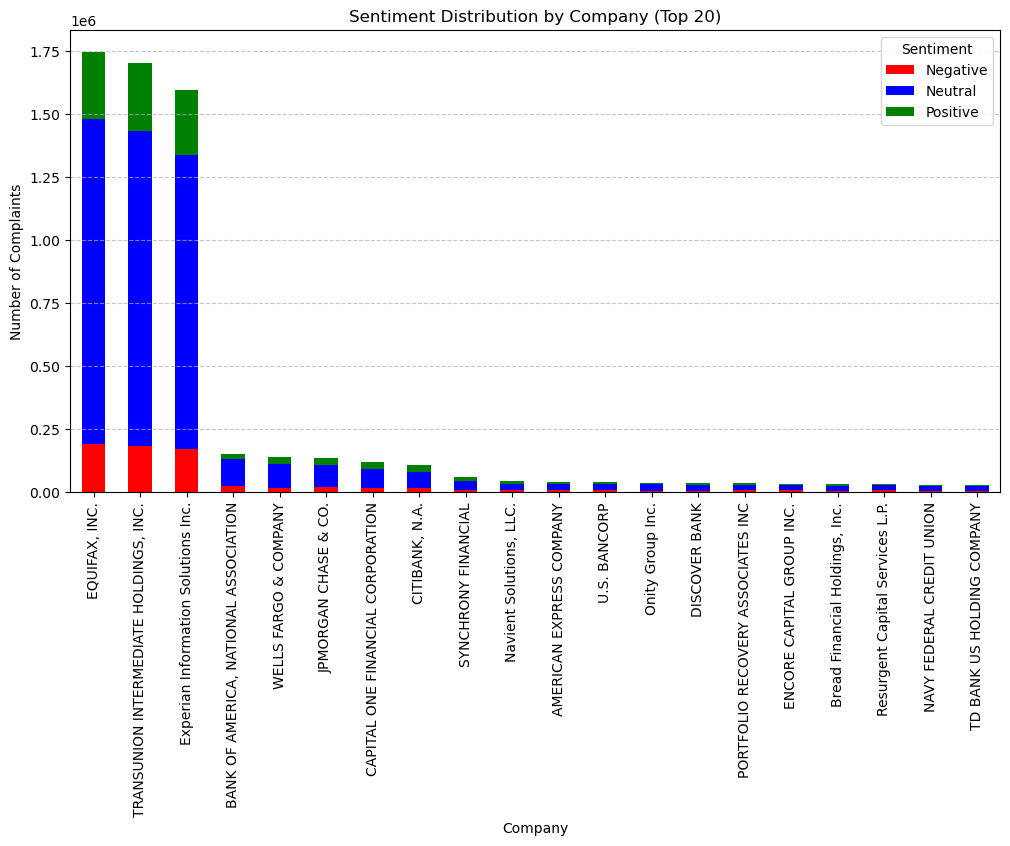

In [37]:

# Count Sentiment by Company
company_sentiment = df_copy.groupby(['Company', 'Sentiment']).size().unstack()

# Sort by Total Complaints
company_sentiment['Total'] = company_sentiment.sum(axis=1)
company_sentiment = company_sentiment.sort_values(by='Total', ascending=False).drop(columns=['Total']).head(20)  # Top 20 companies

# Plot Sentiment by Company
company_sentiment.plot(kind='bar', stacked=True, figsize=(12,6), color=["red", "blue", "green"])
plt.xlabel('Company')
plt.ylabel('Number of Complaints')
plt.title('Sentiment Distribution by Company (Top 20)')
plt.xticks(rotation=90)
plt.legend(title='Sentiment')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Key Observations

### 1️⃣ Credit Bureaus Dominate Complaints

#### Equifax, TransUnion, and Experian receive the most complaints.
#### Indicates issues in credit reporting, disputes, and inaccuracies.

### 2️⃣ Major Banks Also Appear

#### Bank of America, Wells Fargo, JPMorgan Chase have high complaint volumes.
#### Possible reasons: loan processing delays, mortgage disputes, and customer service issues.

### 3️⃣ Debt Collection & Credit Card Companies Show High Negative Sentiment

#### Portfolio Recovery, Synchrony Financial, and Navient Solutions appear in the top complaints.
#### Likely due to aggressive debt collection practices or loan servicing issues.

In [40]:
negative_complaints = df_copy[df_copy['Sentiment'] == 'Negative']['Cleaned_Complaint'].dropna()

In [41]:
# Combine all complaints into one text
text = " ".join(negative_complaints)

In [42]:
from wordcloud import WordCloud
# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds', max_words=100).generate(text)

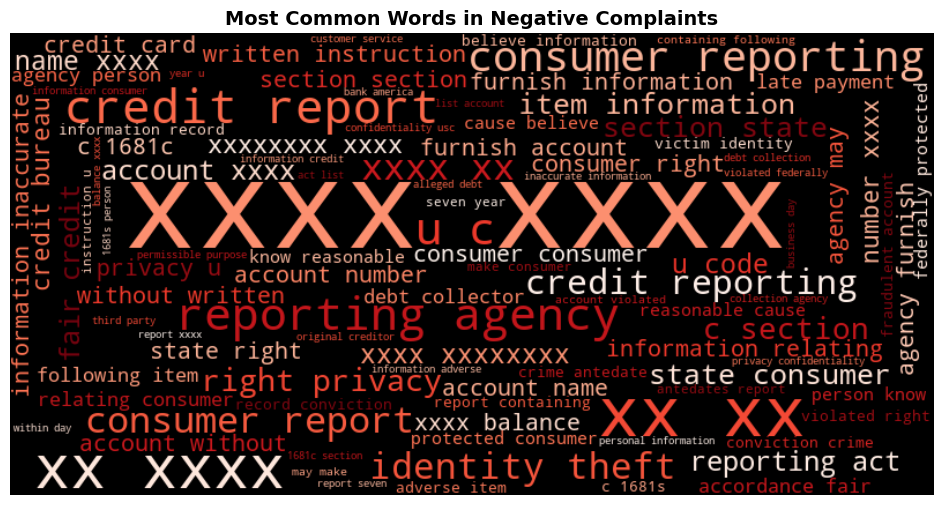

In [43]:
# Display Word Cloud
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Negative Complaints", fontsize=14, fontweight="bold")
plt.show()

In [44]:
# Remove placeholder words like 'XXXX', 'XX', and single-letter placeholders
df_copy['Cleaned_Complaint'] = df_copy['Cleaned_Complaint'].str.replace(r'\bX+\b', '', regex=True)

In [45]:
# Filter Negative Complaints Again
negative_complaints_cleaned = df_copy[df_copy['Sentiment'] == 'Negative']['Cleaned_Complaint'].dropna()

# Combine all complaints into one text
text_cleaned = " ".join(negative_complaints_cleaned)


In [46]:
# Generate Cleaned Word Cloud
wordcloud_cleaned = WordCloud(width=800, height=400, background_color='black', colormap='Reds', max_words=100).generate(text_cleaned)

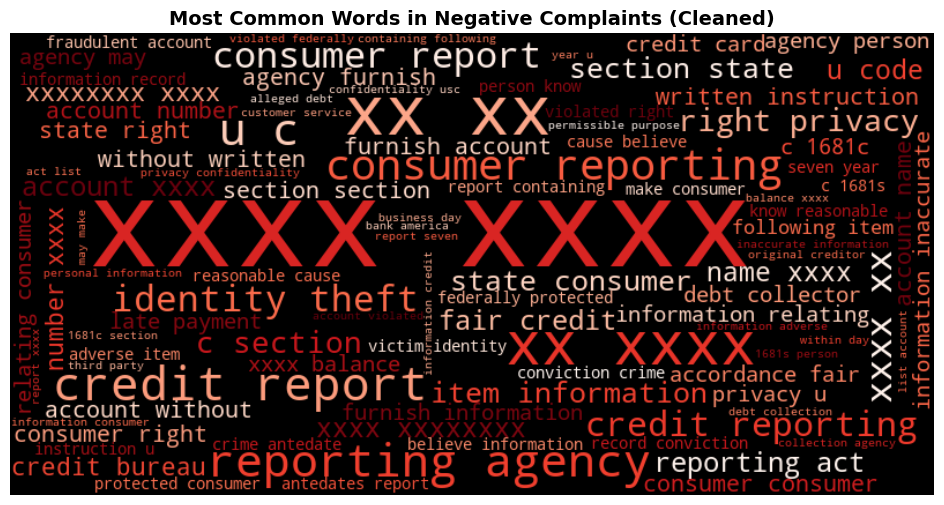

In [47]:
# Display Cleaned Word Cloud
plt.figure(figsize=(12,6))
plt.imshow(wordcloud_cleaned, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Negative Complaints (Cleaned)", fontsize=14, fontweight="bold")
plt.show()